In [3]:
import numpy as np
from math import pi
from matplotlib import pyplot
from ipywidgets import interact

In [4]:
def vNent_calc(GA,epsilon=1e-9):
    chi0, _ =np.linalg.eigh(GA)
    chi1=chi0[np.nonzero(np.abs(chi0)>epsilon)]
    chi2=chi1[np.nonzero(np.abs(chi1-1)>epsilon)]
    return -np.sum((1-chi2)*np.log(1-chi2)+chi2*np.log(chi2))

def vNent_contour(GA,epsilon=1e-9):
    chi0, evec0 =np.linalg.eigh(GA)
    i0=np.nonzero(np.abs(chi0)>epsilon)[0]
    chi1=chi0[i0]
    evec1=evec0[:,i0]
    i1=np.nonzero(np.abs(chi1-1)>epsilon)[0]
    chi2=chi1[i1]
    evec2=evec1[:,i1]
    DvN=-((1-chi2)*np.log(1-chi2)+chi2*np.log(chi2))
    f1=np.dot((np.abs(evec2)**2),np.diag(DvN))
    return np.sum(f1,axis=1) 

In [52]:
N=1000
Lsub=int(N/2)
Npt=int(N/2)
# alpha=2
Nt=10
T0=0.9*N
T1=0.1*N
T=T0+T1

# original deformation L0+L1+L-1
# H1_hop=np.diag(np.sin(pi*np.arange(0.5,N-1)/N)**2,1)

# modified deformation L1+L-1
# H1_hop=np.diag(np.cos(2*pi*np.arange(0.5,N-1)/N)/2,1)

# modified deformation L1+L-1 with shifted origin
# H1_hop=np.diag(np.cos(2*pi*np.arange(-N/2+1,N/2)/N)/2,1)

# parabolic deformation [L1+L-1+ higher order] with shifted origin
R=1/4
Amp=0.5/(1/4-R**2)
H1_hop=Amp*np.diag((np.arange(-N/2+1,N/2)/N)**2-R**2,1)

# alpha deformation [L0+ alpha*(L1+L-1)] with shifted origin
# H1_hop=np.diag(1-alpha* np.cos(2*pi*np.arange(0.5,N-1)/N),1)
# H1_hop[N-1,0]=0
H1=(H1_hop+H1_hop.T) # there is no factor of 1/2 here
E1,V1=np.linalg.eigh(H1)
print("Eigenstates of deformed Hamiltonian are computed")
V1t=np.dot(V1,np.dot(np.diag(np.exp(1j*E1*T1)),V1.T))

H0_hop=np.diag(np.ones(N-1),1)
# H0_hop[N-1,0]=0
H0=(H0_hop+H0_hop.T)/2
E0,V0=np.linalg.eigh(H0)
print("Eigenstates of uniform Hamiltonian are computed")
# V0t=np.dot(V0,np.dot(np.diag(np.exp(1j*E0*T0)),V0.T))
V0t=np.dot(V0,np.dot(np.diag(np.exp(1j*E0*(T0+T1))),V0.T))

UF=np.dot(V0t,V1t)
V_i=np.copy(V0[:,:Npt])
Vt=np.copy(V_i)

vNent_cont=np.zeros((Nt,Lsub))
for i_t in range(Nt):
    print(i_t)
    GA=np.dot(Vt[:Lsub,:],np.transpose(Vt[:Lsub,:]).conj())
    vNent_cont[i_t,:]=vNent_contour(GA)
    Vt=np.dot(UF,Vt)    


Eigenstates of deformed Hamiltonian are computed
Eigenstates of uniform Hamiltonian are computed
0
1
2
3
4
5
6
7
8
9


In [53]:
# data visualization
def plot_EE_contour(t_time=0):
    pyplot.figure()
#     pyplot.plot(np.arange(Lsub)/N,vNent_cont[t_time,:])
    pyplot.plot(np.arange(Lsub)/N,vNent_cont[t_time,:]-vNent_cont[0,:])
    pyplot.ylabel("Entanglement Contour")
    pyplot.xlabel("subsystem size/L")
    pyplot.show()

interact(plot_EE_contour, t_time=(0, Nt-1, 1));

interactive(children=(IntSlider(value=0, description='t_time', max=9), Output()), _dom_classes=('widget-intera…

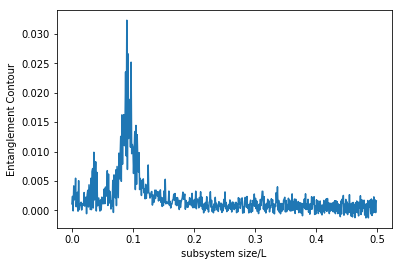

In [51]:
plot_EE_contour(t_time=Nt-1)